### Import Libraries

In [253]:
# General-purpose libraries for operating system interactions, JSON data manipulation, and date/time handling.
import os  # Interact with the operating system
import json  # Work with JSON data
from random import randint  # Generate random integers
from time import sleep  # Introduce delays in code execution

from datetime import datetime, timedelta  # Manipulate dates and times


# Fundamental scientific computing libraries like NumPy and Pandas.
import numpy as np  # Fundamental package for scientific computing
import pandas as pd  # Data manipulation library


# Specialized libraries for scientific computing, namely SciPy
import scipy  # Scientific computing and technical computing library
import scipy.stats as st

# Web-related tasks, such as making HTTP requests, parsing HTML/XML data, and web scraping
import requests as re  # Perform HTTP requests
from bs4 import BeautifulSoup  # Parse HTML and XML data


# Pretty-print Python data structures
import pprint


# Visualization oriented
import matplotlib.pyplot as plt  # Create static visualizations
import seaborn as sns  # Statistical data visualization
from plotly import express as px  # Create interactive plots and charts


# Machine learning : preprocessing, dimensionality reduction, one-hot encoding, and clustering
import sklearn  # Machine learning library

from sklearn import svm

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import StandardScaler  # Standardize features
from sklearn.preprocessing import OneHotEncoder  # One-hot encode categorical features

from sklearn.decomposition import PCA  # Perform dimensionality reduction
from sklearn.cluster import KMeans  # Perform clustering

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    precision_recall_curve, roc_curve, roc_auc_score
)

from model_scoring import scoring


#Handling Imbalanced Datasets
import imblearn  # Handle imbalanced datasets in machine learning


#Web Scraping
import scrapy  # Web scraping framework

import pickle
from sklearn.utils import resample


#Deep Learning
# import pytorch  # Deep learning library

### Import Scaler

In [254]:
def load(filename = "scaler.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 

    except FileNotFoundError: 
        print("File not found!")

scaler = load("scaler.pickle")

### Import Cleaned Data

In [255]:
data = pd.read_csv('cleaned_data.csv')

In [256]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,...,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.601457,0.998969,0.796887,0.302646,1.256969e-04,0.0,0.458143,...,0.312905,0.118250,0,0.009219,0.622879,0.827890,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.610235,0.998946,0.797380,0.303556,2.897851e-04,0.0,0.461867,...,0.314163,0.047775,0,0.008323,0.623652,0.839969,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.601450,0.998857,0.796403,0.302035,2.361297e-04,25500000.0,0.458521,...,0.314515,0.025346,0,0.040003,0.623841,0.836774,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.583541,0.998700,0.796967,0.303350,1.078888e-04,0.0,0.465705,...,0.302382,0.067250,0,0.003252,0.622929,0.834697,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.598783,0.998973,0.797366,0.303475,7.890000e+09,0.0,0.462746,...,0.311567,0.047725,0,0.003878,0.623521,0.839973,0.024752,0.575617,1,0.035490


In [257]:
column_names = list(data.columns)
print(column_names)

['Bankrupt?', ' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' Operating Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %', ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Debt ratio %', ' Long-term fund suitability ratio (A)', ' Borrowing depende

### Oversampling

In [258]:
X = data.drop(['Bankrupt?'], axis=1)
Y = data['Bankrupt?']

In [259]:
X_train_scaled = scaler.fit(X)
X_train_norm = pd.DataFrame(X_train_scaled.transform(X), columns=X.columns)

train = pd.concat([X_train_norm, Y], axis=1)

In [260]:
#  Oversampling

yes_bankrupt = train[train['Bankrupt?']==1]
no_bankrupt = train[train['Bankrupt?']==0]

yes_bankrupt_oversampled = resample(
    yes_bankrupt,
    replace=True,
    n_samples=len(no_bankrupt),
    random_state=0,
)

train_oversampled = pd.concat([no_bankrupt,yes_bankrupt_oversampled],axis=0).dropna()

In [261]:
Y_train_over = train_oversampled['Bankrupt?'].copy()
X_train_over = train_oversampled.drop(['Bankrupt?'], axis=1).copy()

### Create Training Folds

In [262]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [263]:
# # Split the data into training and testing sets
# X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=.25, random_state=42)

In [264]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train_over, Y_train_over, test_size=.25, random_state=42)

### Train & Test Model

In [265]:
from sklearn.naive_bayes import GaussianNB

In [266]:
# Create instances of GaussianNB
GaussianNB_model = GaussianNB()

GaussianNB_Y_pred = GaussianNB_model.fit(X_train, Y_train)

In [267]:
# Make predictions on train and test sets
GaussianNB_train_prediction = GaussianNB_Y_pred.predict(X_train)

GaussianNB_test_prediction = GaussianNB_Y_pred.predict(X_test)

# Evaluation metrics for DecisionTreeClassifier
GaussianNB_train_accuracy = accuracy_score(Y_train, GaussianNB_train_prediction)
GaussianNB_train_precision = precision_score(Y_train, GaussianNB_train_prediction)
GaussianNB_train_recall = recall_score(Y_train, GaussianNB_train_prediction)

GaussianNB_test_accuracy = accuracy_score(Y_test, GaussianNB_test_prediction)
GaussianNB_test_precision = precision_score(Y_test, GaussianNB_test_prediction)
GaussianNB_test_recall = recall_score(Y_test, GaussianNB_test_prediction)

In [268]:
print("GaussianNB:")
print("***")
print("Train Accuracy:", GaussianNB_train_accuracy)
print("Train Precision:", GaussianNB_train_precision)
print("Train Recall:", GaussianNB_train_recall)
print("***")
print("Test Accuracy:", GaussianNB_test_accuracy)
print("Test Precision:", GaussianNB_test_precision)
print("Test Recall:", GaussianNB_test_recall)

GaussianNB:
***
Train Accuracy: 0.8084461507375227
Train Precision: 0.7565580618212198
Train Recall: 0.9116166700221462
***
Test Accuracy: 0.7948484848484848
Test Precision: 0.7379172894867962
Test Recall: 0.9074754901960784


# SCORING

In [269]:
from model_scoring import scoring

'The accuracy score of the model is: 0.8084461507375227 '
'The precision score of the model is: 0.7565580618212198 '
'The recall score of the model is: 0.9116166700221462 '
'The ROC AUC score of the model is: 0.8080695396348816 '


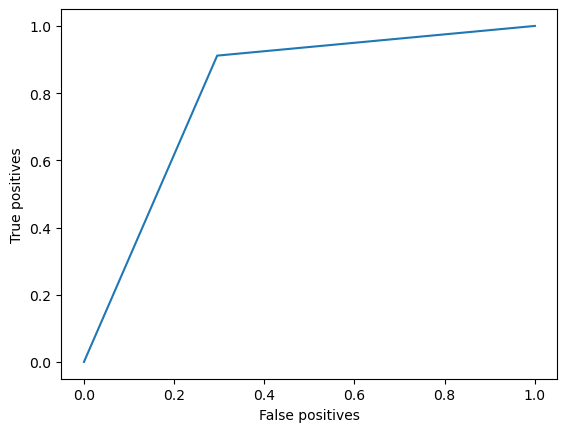

In [270]:
scoring(Y_train, GaussianNB_train_prediction)

'The accuracy score of the model is: 0.7948484848484848 '
'The precision score of the model is: 0.7379172894867962 '
'The recall score of the model is: 0.9074754901960784 '
'The ROC AUC score of the model is: 0.7960638841867682 '


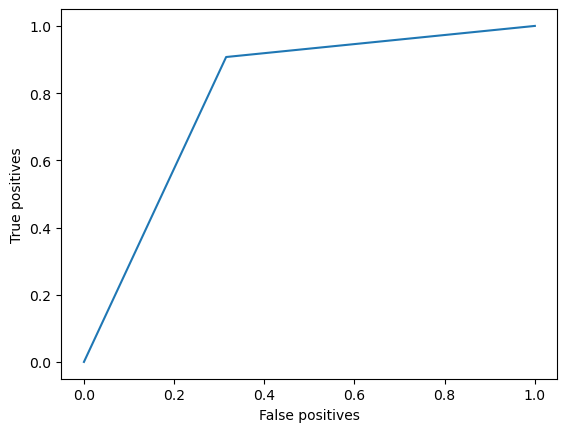

In [271]:
scoring(Y_test, GaussianNB_test_prediction)